In [173]:
# Text mining and visualisation packages
library(qdap)
library(tm)
library(wordcloud)
library(plotrix)

# Suppress warnings
options(warn=-1)

In [67]:
lincoln_movie_review = 'Beginning as the Civil War is approaching its end, Steven Spielberg’s Lincoln follows President Abraham Lincoln (Daniel Day-Lewis) as he tries to secure the passage of the 13th Amendment, which would end slavery. Wanting Congress to pass the amendment before the Confederate states return to the Union, Lincoln must wrangle votes from not only the Democratic opposition, but fellow Republicans such as Thaddeus Stevens (Tommy Lee Jones), who has a more radical vision for the future of the nation. Lincoln is a stately drama, with immaculate direction, a script of towering power, and an incredible performance by Day-Lewis.'

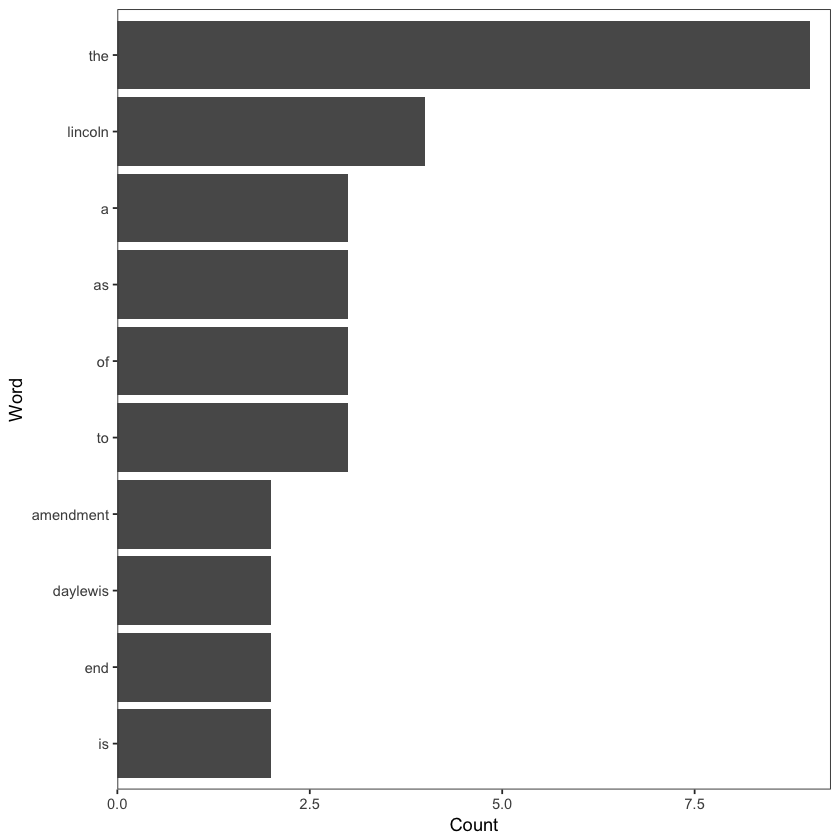

In [68]:
#print (lincoln_movie_review)

# extracting the 10 most frequent terms
term_count <- freq_terms(lincoln_movie_review, 10) 

# Plot term_count
plot(term_count)

# Advanced text mining with Coffee dataset

In [69]:
tweets <- read.csv('../data/coffee.csv', stringsAsFactors=FALSE)
str(tweets)
print ("Printing few rows of the data from the top")
head(tweets)

'data.frame':	1000 obs. of  13 variables:
 $ num         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ text        : chr  "@ayyytylerb that is so true drink lots of coffee" "RT @bryzy_brib: Senior March tmw morning at 7:25 A.M. in the SENIOR lot. Get up early, make yo coffee/eakfast, "| __truncated__ "If you believe in #gunsense tomorrow would be a very good day to have your coffee any place BUT tarbucks Guns+C"| __truncated__ "My cute coffee mug. http://t.co/2udvMU6XIG" ...
 $ favorited   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ replyToSN   : chr  "ayyytylerb" "<NA>" "<NA>" "<NA>" ...
 $ created     : chr  "08/09/13 2:43" "08/09/13 2:43" "08/09/13 2:43" "08/09/13 2:43" ...
 $ truncated   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ replyToSID  : num  3.66e+17 NA NA NA NA ...
 $ id          : num  3.66e+17 3.66e+17 3.66e+17 3.66e+17 3.66e+17 ...
 $ screenName  : chr  "thejennagibson" "carolynicosia" "janeCkay" "AlexandriaOOTD" ...
 $ retweetCount: int  0 1 0 0 2 0 0 0 1 2 ...
 $ r

num,text,favorited,replyToSN,created,truncated,replyToSID,id,screenName,retweetCount,retweeted,longitude,latitude
1,@ayyytylerb that is so true drink lots of coffee,FALSE,ayyytylerb,08/09/13 2:43,FALSE,3.66e+17,3.66e+17,thejennagibson,0,FALSE,NA,NA
2,"RT @bryzy_brib: Senior March tmw morning at 7:25 A.M. in the SENIOR lot. Get up early, make yo coffee/eakfast, cus this will only happen ?",FALSE,<NA>,08/09/13 2:43,FALSE,NA,3.66e+17,carolynicosia,1,FALSE,NA,NA
3,If you believe in #gunsense tomorrow would be a very good day to have your coffee any place BUT tarbucks Guns+Coffee=#nosense @MomsDemand,FALSE,<NA>,08/09/13 2:43,FALSE,NA,3.66e+17,janeCkay,0,FALSE,NA,NA
4,My cute coffee mug. http://t.co/2udvMU6XIG,FALSE,<NA>,08/09/13 2:43,FALSE,NA,3.66e+17,AlexandriaOOTD,0,FALSE,NA,NA
5,RT @slaredo21: I wish we had Starbucks here... Cause coffee dates in the morning sound perff!,FALSE,<NA>,08/09/13 2:43,FALSE,NA,3.66e+17,Rooosssaaaa,2,FALSE,NA,NA
6,Does anyone ever get a cup of coffee before a cocktail??,FALSE,<NA>,08/09/13 2:43,FALSE,NA,3.66e+17,E_Z_MAC,0,FALSE,NA,NA


In [70]:
coffee_tweets <- tweets$text
coffee_source <- VectorSource(coffee_tweets) #Vector Source
coffee_corpus <- VCorpus(coffee_source) #Volatile corpus

print (coffee_corpus)
print (coffee_corpus[[15]]) #Printing 15th tweet in coffee_corpus
print (coffee_corpus[[15]][1]) #Printing contents of the 15th tweet in coffee_corpus

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1000
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 108
$content
[1] "@HeatherWhaley I was about 2 joke it takes 2 hands to hold hot coffee...then I read headline! n'tDrinkNShoot"



# Preprocessing

In [71]:
clean_corpus <- function(corpus){
  corpus <- tm_map(corpus, stripWhitespace)
  corpus <- tm_map(corpus, removePunctuation)
  corpus <- tm_map(corpus, content_transformer(tolower))
  corpus <- tm_map(corpus, removeWords, c(stopwords("en"), "coffee", "mug"))
  return(corpus)
}

clean_corp <- clean_corpus(coffee_corpus)
print (clean_corp[[227]][1]) #Cleaned up tweet
tweets$text[227] #Original tweet

$content
[1] "also dogs arent smart enough  dip  donut      eat  part thats  dipped yandthetramp"



[1] "Also, dogs aren't smart enough to dip the donut in the coffee and then eat the part that's been dipped. yandthetramp"

# Document Term Matrix

In [72]:
coffee_dtm <- DocumentTermMatrix(clean_corp)
print (coffee_dtm)

coffee_m <- as.matrix(coffee_dtm) #To matrix
print (dim(coffee_m))

# Reviewing a portion of the matrix
print (coffee_m[148:150, 2587:2590]) #Glimpse of the matrix

<<DocumentTermMatrix (documents: 1000, terms: 3084)>>
Non-/sparse entries: 7310/3076690
Sparsity           : 100%
Maximal term length: 27
Weighting          : term frequency (tf)
[1] 1000 3084
     Terms
Docs  stealing steamers stephen stepmom
  148        0        0       0       0
  149        0        0       0       0
  150        0        0       0       0


# Term Document Matrix

In [73]:
coffee_tdm <- TermDocumentMatrix(clean_corp)
print (coffee_tdm)

coffee_m <- as.matrix(coffee_tdm) #To matrix
print (dim(coffee_m))

print (coffee_m[2587:2590, 148:150]) #Glimpse of the matrix

<<TermDocumentMatrix (terms: 3084, documents: 1000)>>
Non-/sparse entries: 7310/3076690
Sparsity           : 100%
Maximal term length: 27
Weighting          : term frequency (tf)
[1] 3084 1000
          Docs
Terms      148 149 150
  stealing   0   0   0
  steamers   0   0   0
  stephen    0   0   0
  stepmom    0   0   0


# Exploring top 15 frequencies

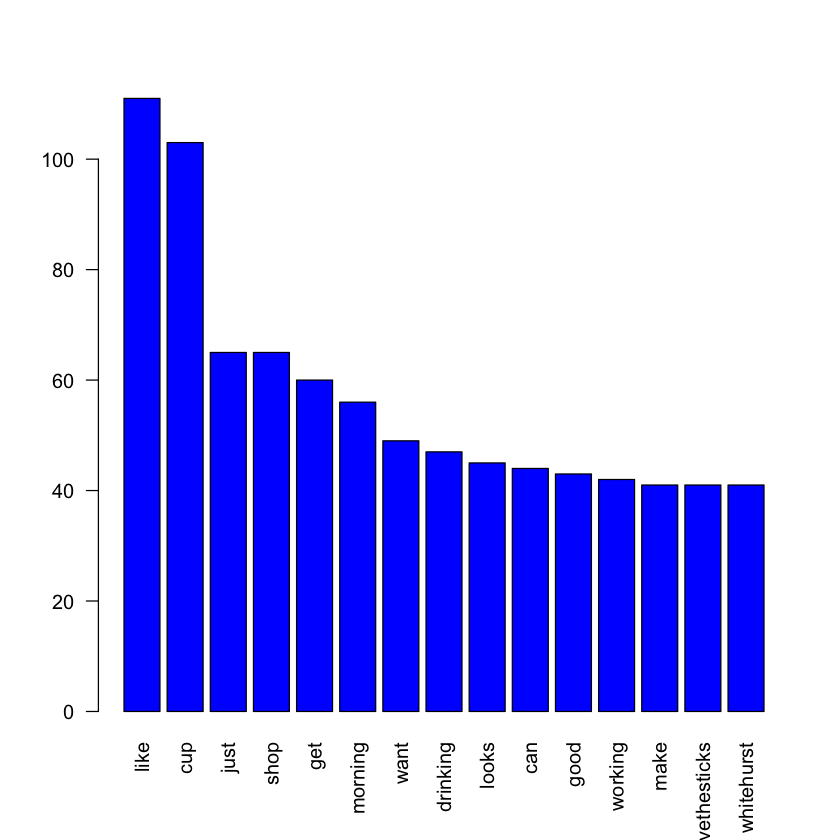

In [82]:
coffee_m <- as.matrix(coffee_tdm)

term_frequency <- sort(rowSums(coffee_m), decreasing=TRUE) #Calculating term frequencies in decending order

#print (term_frequency[1:10])

# Displaying top 10 terms
barplot (term_frequency[1:15], col="blue", las=2)

# Exploring top 10 frequencies with qdap

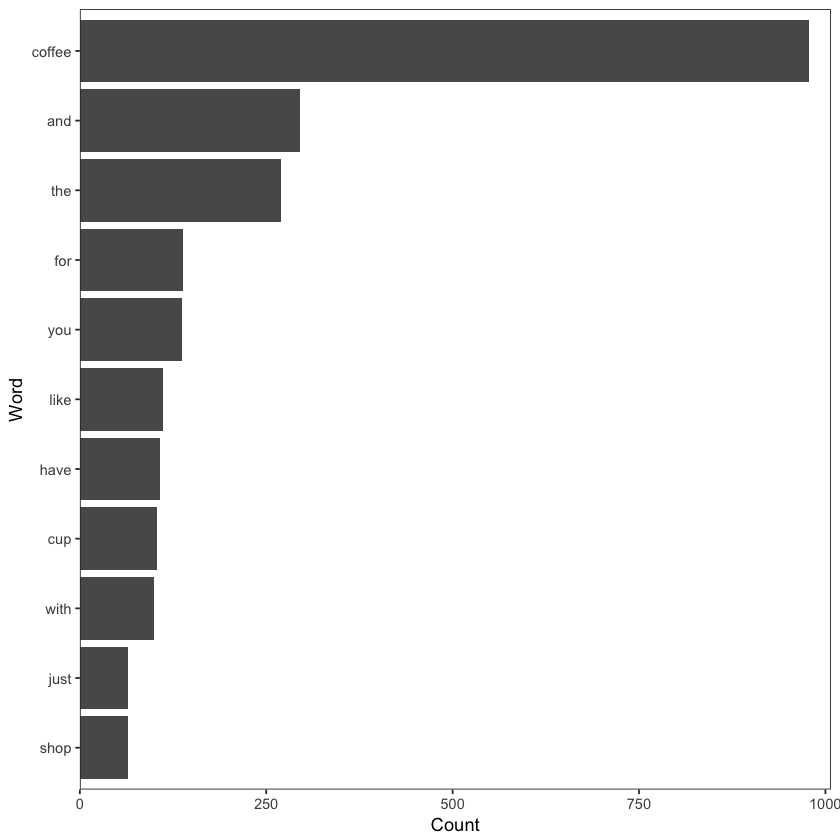

In [96]:
frequency <- freq_terms(tweets$text, top=10, at.least=3, stopwords="Top200Words")

# plot of the frequency
plot (frequency)

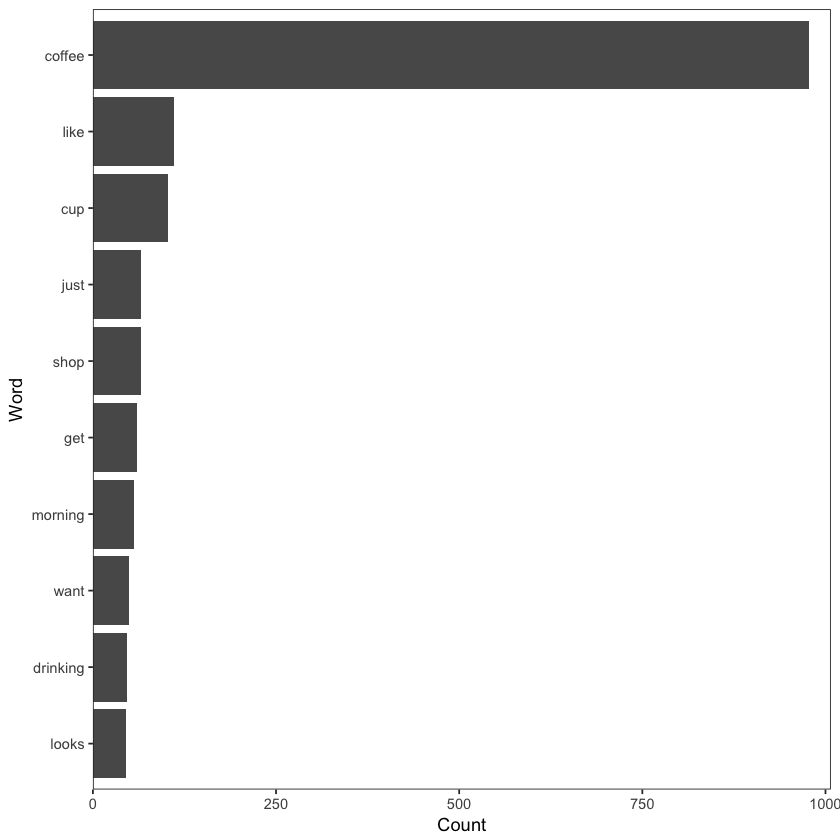

In [97]:
# Using stopwords package
frequency2 <- freq_terms(tweets$text, top=10, at.least=3, stopwords=tm::stopwords("english"))
# Plot of the frequency
plot (frequency2)

# Simple wordcloud visualisation

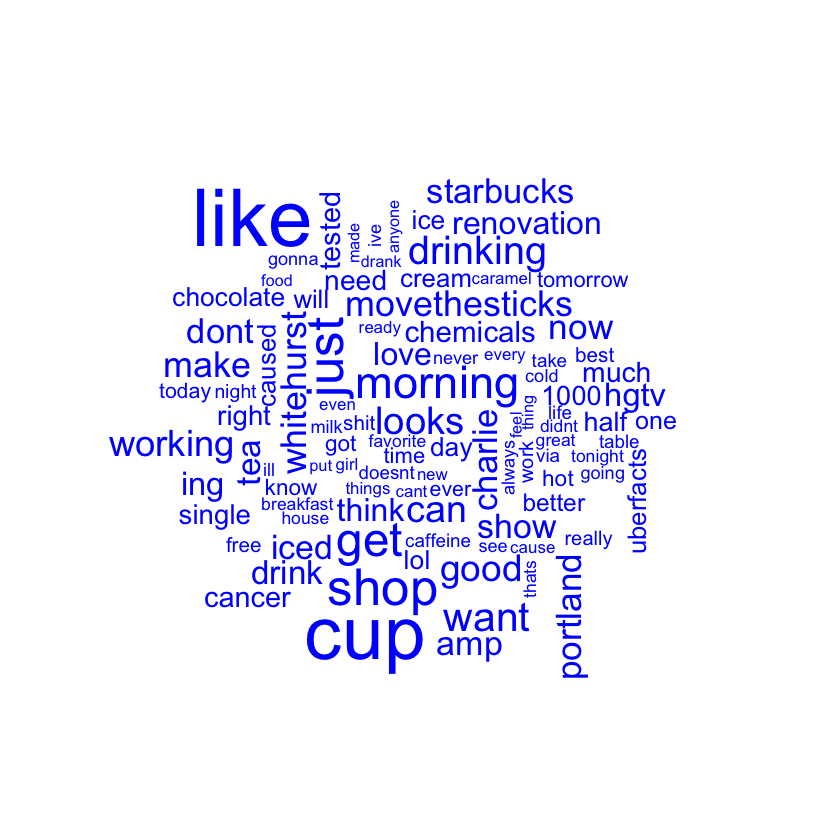

In [99]:
word_frequency <- data.frame(term = names(term_frequency), num = term_frequency)

# Wordcloud visualisation of the frequency
wordcloud(word_frequency$term, word_frequency$num, max.words = 100, colors = "blue")

# Advanced Wordcloud visualisation

In [111]:
clean_corpus <- function(corpus){
  corpus <- tm_map(corpus, removePunctuation)
  corpus <- tm_map(corpus, stripWhitespace)
  corpus <- tm_map(corpus, removeNumbers)
  corpus <- tm_map(corpus, content_transformer(tolower))
  corpus <- tm_map(corpus, removeWords, 
                   c(stopwords("en"), "amp", "chardonnay", "wine", "glass", "coffee")) #Adding additional stop words
  return(corpus)
}

clean_coffee_corpus <- clean_corpus(coffee_corpus)
coffee_tdm <- TermDocumentMatrix(clean_coffee_corpus)
coffee_m <- as.matrix(coffee_tdm)
coffee_words <- rowSums(coffee_m)
sorted_coffee_words <- sort(coffee_words, decreasing=TRUE)

#Top 10 most frequent words
print (sorted_coffee_words[1:10])

    like      cup     just     shop      get  morning     want drinking 
     111      103       65       65       60       56       49       47 
   looks      can 
      45       44 


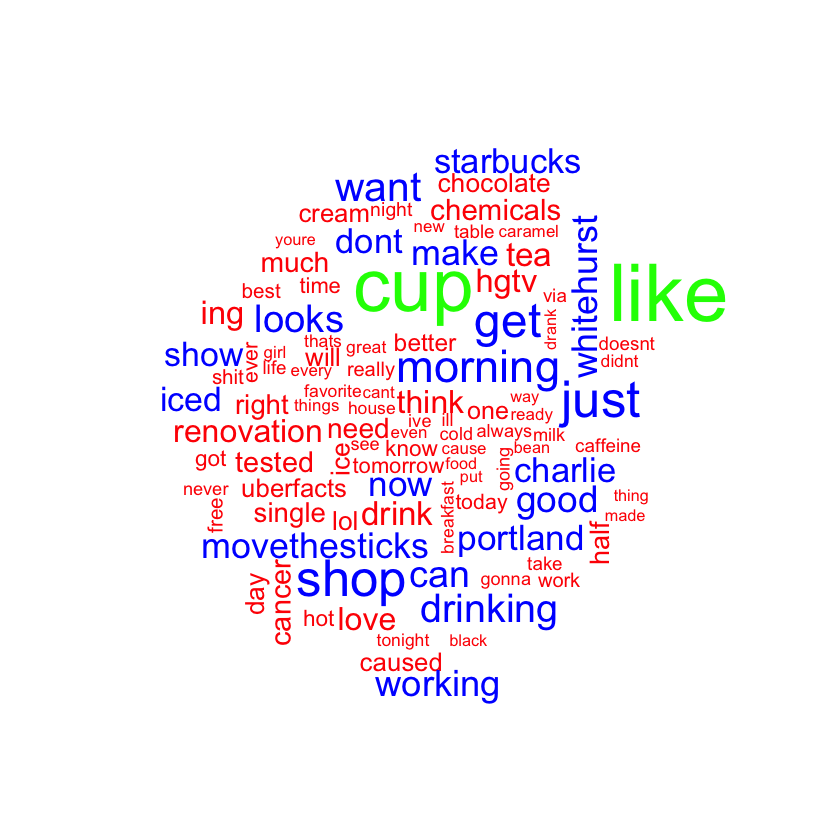

In [114]:
# Dataframe for coffee frequency
coffee_freqs <- data.frame(term = names(sorted_coffee_words), num=sorted_coffee_words)

# Wordcloud with different colors
wordcloud(coffee_freqs$term, coffee_freqs$num, max.words=100, colors=c("red", "blue", "green"))

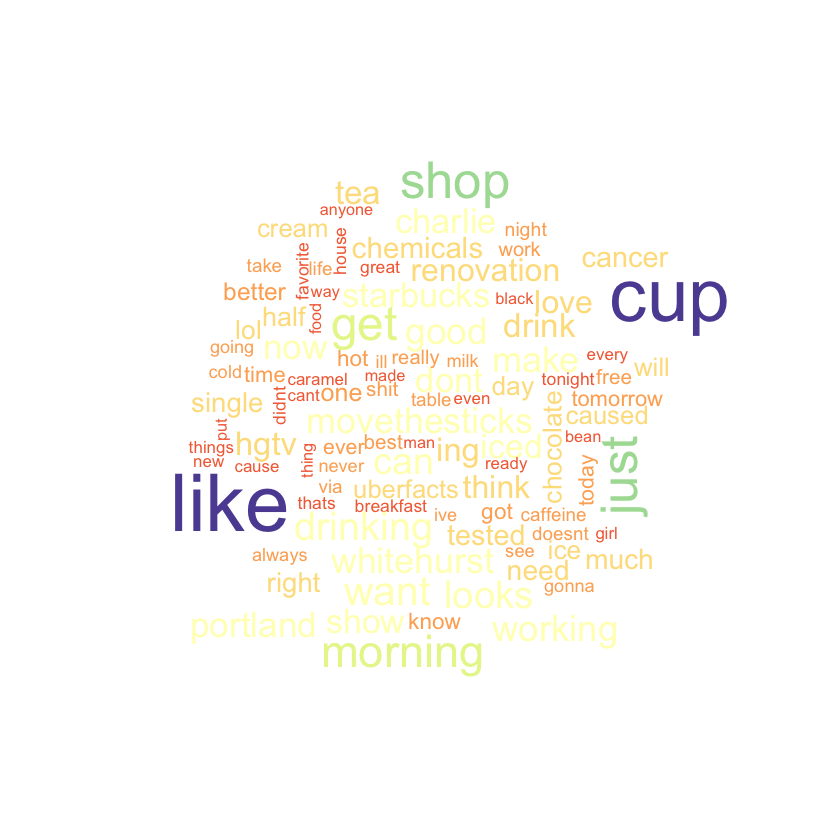

In [121]:
# Wordcloud using pre-built color palettes

#print (display.brewer.all())
# Create purple_orange
spectral_all <- brewer.pal(11, "Spectral")
spectral_dark <- spectral_all[-(1:2)] #Dropping faintest colors

# Wordcloud using inbuilt palette
wordcloud(coffee_freqs$term, coffee_freqs$num, max.words=100, colors=spectral_dark)

# Building Word Network on the Coffee dataset

In [146]:
# Loading additional chardonnay dataset
chardonnay_tweets <- read.csv("../data/chardonnay_tweets.csv", header=TRUE, stringsAsFactors=FALSE)

all_coffee_tweets <- paste(tweets$text, collapse=" ")
all_chardonnay_tweets <- paste(chardonnay_tweets$tweets, collapse=" ")

#Building merge of both the channels
all_tweets <- c(all_coffee_tweets, all_chardonnay_tweets)
#Creating VectorSource and VCorpus from all_tweets
all_tweets <- VectorSource(all_tweets)
all_corpus <- VCorpus(all_tweets)

# Visualizing Common words in both the channels

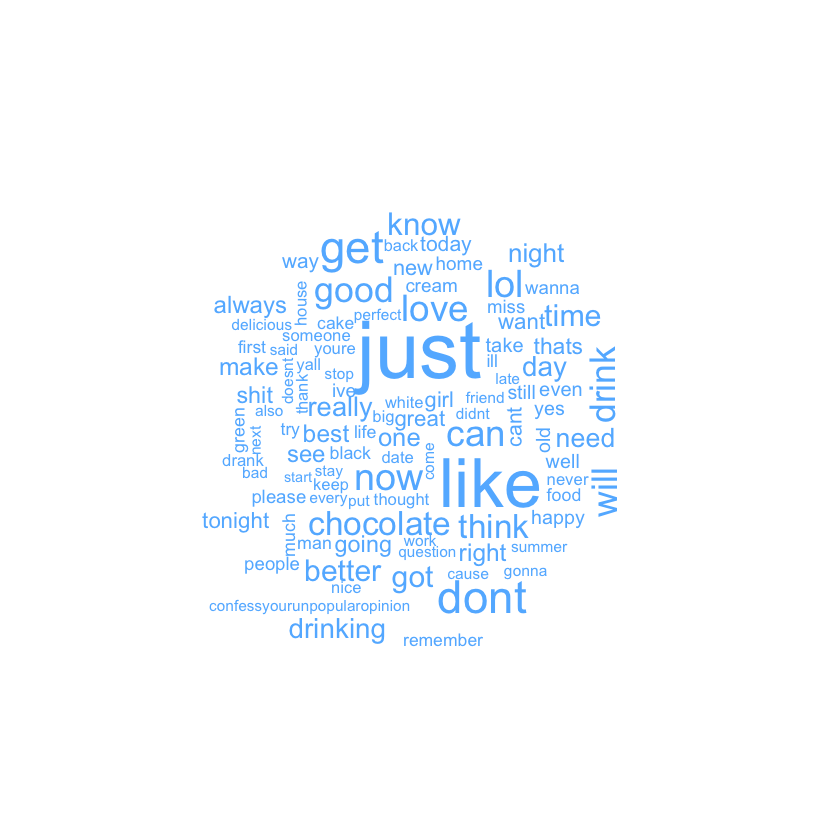

In [152]:
# Preprocessing 
cleaned_tweet <- clean_corpus(all_corpus)
tweet_tdm <- TermDocumentMatrix(cleaned_tweet)
tweet_tdm_matrix <- as.matrix(tweet_tdm)

# Visualising Commonality Cloud
commonality.cloud (tweet_tdm_matrix, colors="steelblue1", max.words=100)

# Visualizing Dissimilar words in both the channels

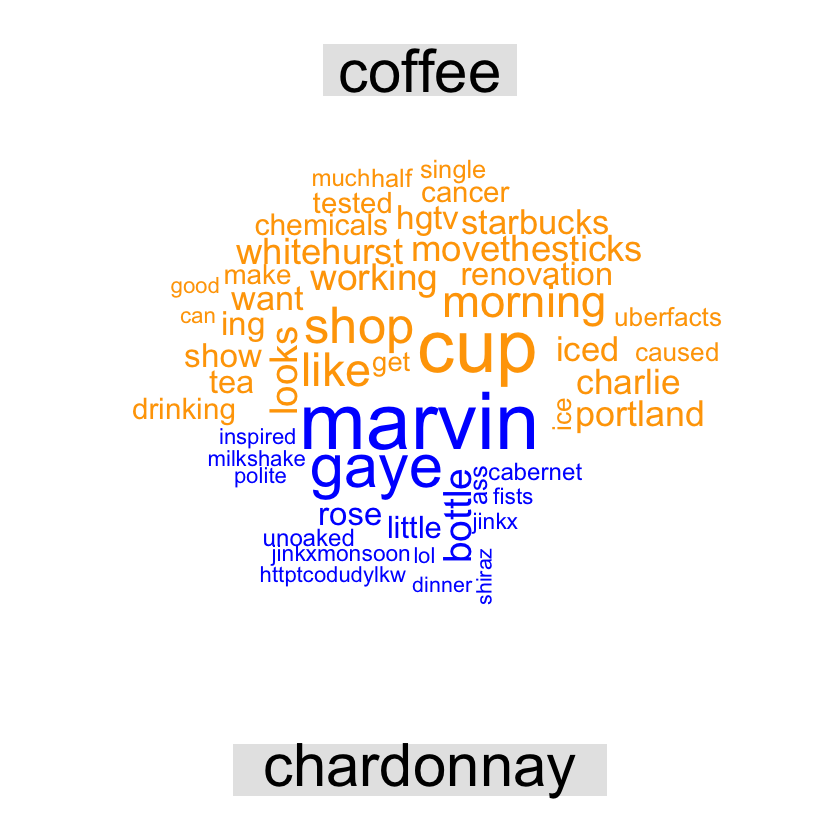

In [155]:
# Creating distinct column identifiers
colnames(tweet_tdm_matrix) <- c("coffee", "chardonnay")

# Visualising Comparison Cloud
comparison.cloud (tweet_tdm_matrix, colors=c("orange", "blue"), max.words=50)

# Polarised Tag Cloud

[1] 5.1 4.1 4.1 2.1

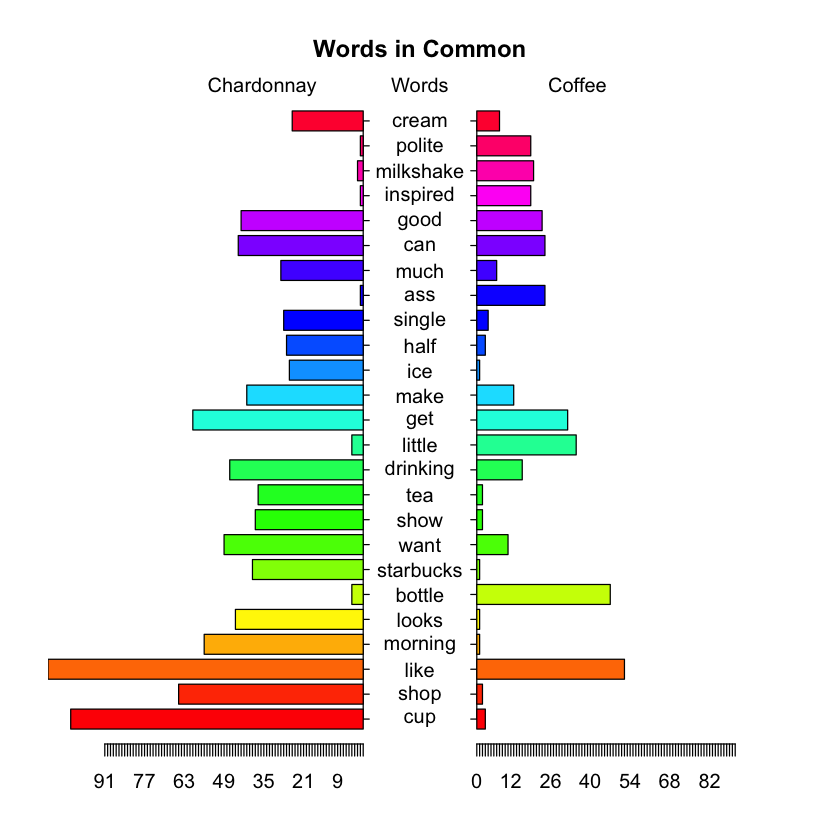

In [179]:
common_words <- subset(tweet_tdm_matrix, tweet_tdm_matrix[, 1] > 0 & tweet_tdm_matrix[, 2] > 0)
difference <- abs(common_words[, 1] - common_words[, 2])

# Combining them both
common_words <- cbind(common_words, difference)

# Sorting from descending order of differences
common_words <- common_words[order(common_words[, 3], decreasing = TRUE), ]

# Extracting top 25
top25_df <- data.frame(x = common_words[1:25, 1], 
                       y = common_words[1:25, 2], 
                       labels = rownames(common_words[1:25, ]))

# Creating the pyramid plot
pyramid.plot(top25_df$x, top25_df$y, labels=top25_df$labels,top.labels=c("Chardonnay", "Words", "Coffee"), main="Words in Common", laxlab=NULL, raxlab=NULL, unit=NULL, gap=20)

# Visualising Word Networks


Match Terms

List 1:
baristakyo, barista




  row group unit text                                                                                                                            
1 544   all  544 RT @Barista_kyo: #coffee #latte #soylatte #thinkcoffee # # # # @ think coffee http://t.co/Hmy9RPRWTZ                            
2 569   all  569 RT @ReversoSmith: What a beautiful mess! #portafilter #coffee #espresso #coffeemachine #barista istalife? http://t.co/ZODcTfP22Z
3 658   all  658 The moment you realize your Starbucks barista gave you a regular iced Coffee when u asked 4 decaf. ty. Late night not planned.  
4 930   all  930 Barista made my coffee wrong and still gave me both anyway #Starbucks #coffee #caffeine #upallnight ://t.co/iKCNwO8F6t          
5 950   all  950 RT @FrankIero: hahaha @jamiasan :*gives Barista our Starbucks order* Barista: coffee? @jamiasan : yes, t this is a coffee store?

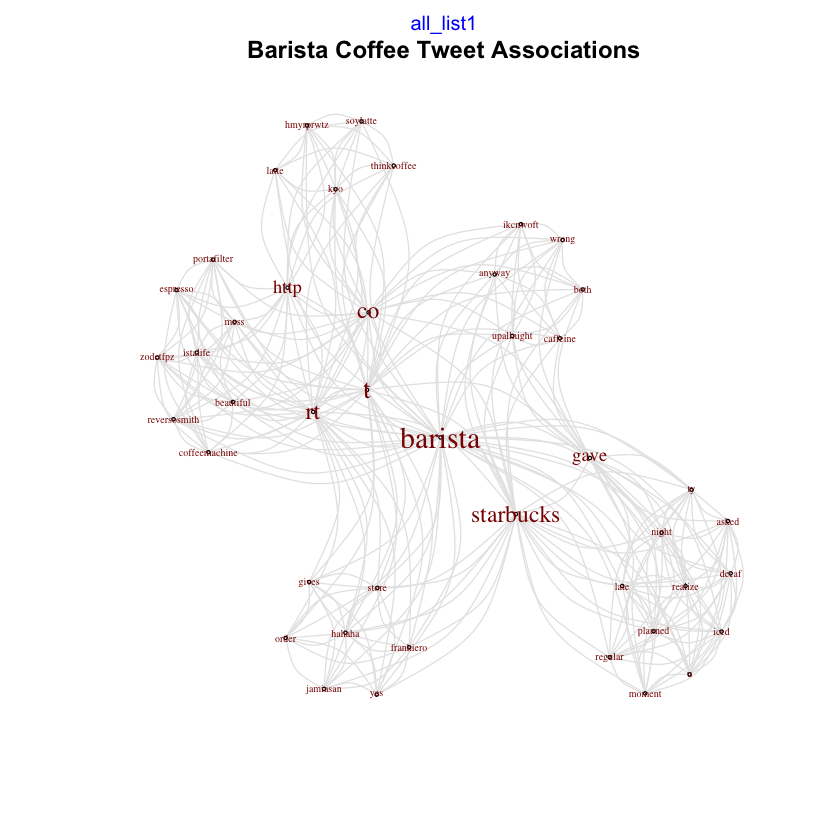

In [180]:
word_associate(coffee_tweets, match.string = c("barista"), stopwords = c(Top200Words, "coffee", "amp"), network.plot = TRUE, cloud.colors = c("gray85", "darkred"))
title(main = "Barista Coffee Tweet Associations")



Match Terms

List 1:
starbucks, starbuckslike, starbuckscard




   row group unit text                                                                                                                                        
1    5   all    5 RT @slaredo21: I wish we had Starbucks here... Cause coffee dates in the morning sound perff!                                               
2   26   all   26 RT @Leslieks: .@Starbucks I have a morning free tomorrow &amp; was going to have coffee w/friends, but until you get some #Gunsense! #momsd?
3   27   all   27 Starbucks Coffee is the best!!! #confessyourunpopularopinion                                                                                
4   34   all   34 just drank an entire venti coffee from Starbucks &amp; still think I'm gonna fall asleep #wtf                                               
5   52   all   52 RT @SarahWCaron: Apparently tomorrow is Starbucks Appreciation Day for gun enthusiasts where they go, coffee and bring guns. I know whe?    
6   62   all   62 I think I need another coffe

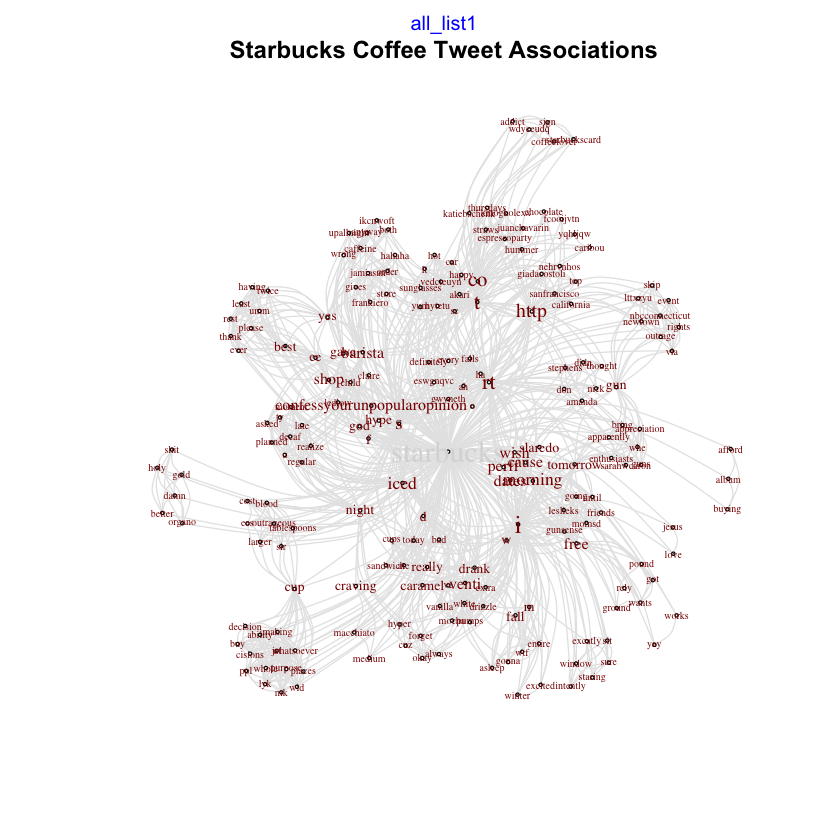

In [178]:
# Starbucks coffee tweet association
word_associate(coffee_tweets, match.string = c("starbucks"), stopwords = c(Top200Words, "coffee", "amp"), network.plot = TRUE, cloud.colors = c("gray85", "darkred"))
title(main = "Starbucks Coffee Tweet Associations")

# Creating Dendrogram

In [189]:
tdm1 <- removeSparseTerms(tweets_tdm, sparse=0.95)
print (tdm1)
tdm2 <- removeSparseTerms(tweets_tdm, sparse=0.975)
print (tdm2)

ERROR: Error in inherits(x, c("DocumentTermMatrix", "TermDocumentMatrix")): object 'tweets_tdm' not found
